# Section 3: Introduction to High-Performance Computing on Multi-CPU cores

So far, we have been writing algorithms that are executed step-by-step.

Then, every line we write, the Python Interpreted converts it into Machine code and such instructions are executed by one single CPU processor.

## 3.1 What's a CPU?


Its names comes from **C**entral **P**rocessing **U**nit.

It is the responsible for executing every instruction that it is given, handling the processing of _logical_ and _mathematical_ operations.

In short, the main tasks for a CPU are:
+ Reading each instruction from memory. The CPU and RAM constantly work together. This is also called reading from memory.
+ Decoding or translating instructions in a way it can understand (Machine code).
+ Executing and carrying out the given instructions.
+ Storying the result of an execution back to memory (writing to memory).





## 3.2. The power of low-level compilers

### 3.2.1. Just-In-Time Compilation

![](imgs/slides_d2/028.PNG)

+ Just-in-time (JIT) compilation is a way of executing computer code that involves compilation during *execution of a program* rather than before execution. 

+ JIT compilation combines the speed of compiled code with the versability and flexibility of interpretation.

### 3.2.2. Numba to the rescue

#### 3.2.2.1. What's Numba?


![](imgs/slides_d2/030.PNG)

Numba is a High-Performance compiler for Python. It translates a subset of Python and NumPy functions into low-level code for speed.

Numba is best used for loops, numpy arrays operations and functions.

Some of its properties are:
1. Compile Python code into an intermediate code readable for LLVM (Low Level Virtual Machine).
2. Vectorize functions.
3. Run functions in parallel both Multi-CPU and GPU cores.
4. Easy to use thanks to decorators.

Here, we want to gain speed without having to change many lines in our programs. 

Due to Python is a high-level language, we will try to generate a low-level intermediate language through compilation 💡.

Let's see how it works.

#### 3.2.2.2. Numba's `@decorators`

Remember : Decorators allow us to modify functions and extend their use. 

We can compile our Python code by using Numba's decorators. In fact, when we call a Numba-decorated function _it is compiled to machine code "just-in-time"_ for execution.

In this way, our code can really run close to machine code speed!

#### 3.2.2.3. `nopython` mode

The Numba @jit decorator fundamentally operates in two compilation modes, nopython mode and object mode.

If we define the `@jit` decorator with the parameter `nopython=True`, the decorated function will run enterily without the involvement of the Python Interpreter.

This is the recommended and best-practice way.

(_source: [Numba](https://numba.pydata.org/)_).


##### 3.2.2.3.1. Example: Using a JIT decorator

Let's compare a compiled version of my_sum with the one that executed by the Python Interpreter.

In [ ]:
from numba import jit
import numpy as np

In [ ]:
def my_py_sum(x):
    result = 0
    for i in range(len(x)):
        result = result + x[i]
    return result

In [ ]:
@jit(nopython=True)
def my_njit_sum(x):
    result = 0
    for i in range(len(x)):
        result = result + x[i]
    return result

In [ ]:
# generating data
x = np.random.randint(10, size=100_000)

Let's compare execution times !

In [ ]:
%timeit my_py_sum(x)

100 loops, best of 5: 16.6 ms per loop


In [ ]:
%timeit my_njit_sum(x)

The slowest run took 11276.69 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 12.5 µs per loop


#### 3.2.2.4. Exercise (`nopython` mode)

1. Given two methods `py_sum(x,y)` and `np.sum(x,y)`, creates a method `numba_sum(x,y)` that computes the L1-distance of each element of two input arrays `x` and `y` with lengths $N$ (i.e., $\sum_{i=0}^{N-1} |x_i - y_i|$). 

   Be sure of _using Python's built-in functions only_ for the `numba_sum(x,y)` function. 
   
   Finally, measure their computational time for every method and compare them!

2. **(Bonus):** Run 10 repetitions of the same computation, store those computation times, and show the mean and standard deviation for `py_sum(x)`, `np.sum(x)`, and`numba_sum(x)`.


In [ ]:
import numpy as np
from numba import jit
import time

In [ ]:
# Generating 1M random numbers from (0,9).
x = np.random.randint(10, size=1_000_000) 
y = np.random.randint(10, size=1_000_000) 

In [ ]:
def py_sum(x, y):
    N = len(x)
    # creating a list of N elements
    result = 0 #[ 0 for _ in range(len(N))]
    for i in range(N):
    result = result + abs(x[i] - y[i])
    return result

In [ ]:
# add a decorator here !
def numba_sum(x, y):
    N = len(x)
    result = 0.
    for i in range(N):
        result = result + abs(x[i] - y[i])
    return result

Reminder: `time.time()` returns the current time (in seconds) of its execution!

In [ ]:
from time import time

In [ ]:
exec_time_python = time()
py_sum(x,y)
exec_time_python = time() - exec_time_python

In [ ]:
exec_time_numpy = time()
# write a numpy function here !
exec_time_numpy = time() - exec_time_numpy

In [ ]:
exec_time_numba = time()
# execute your compiled numba function here!
exec_time_numba = time() - exec_time_numba

In [ ]:
# print every execution time here

Any conclusion?

#### 3.2.2.4. Solution

In [ ]:
# your solution here

#### 3.2.2.4. Solution

In [ ]:
import numpy as np
from numba import jit
from time import time

In [ ]:
# Generating 1M random numbers from (0,9).
x = np.random.randint(10, size=1_000_000) 
y = np.random.randint(10, size=1_000_000) 

In [ ]:
def py_sum(x, y):
    N = len(x)
    # creating a list of N elements
    result = 0 #[ 0 for _ in range(len(N))]
    for i in range(N):
        result = result + abs(x[i] - y[i])
    return result

In [ ]:
@jit(nopython = True)
def numba_sum(x, y):
    N = len(x)
    result = 0.
    for i in range(N):
        result = result + abs(x[i] - y[i])
    return result

In [ ]:
py_sum(x, y)

3301174

In [ ]:
exec_time_python = time()
py_sum(x,y)
exec_time_python = time() - exec_time_python

In [ ]:
exec_time_numpy = time()
np.sum(np.abs(x-y))
exec_time_numpy = time() - exec_time_numpy

In [ ]:
exec_time_numba = time()
numba_sum(x,y)
exec_time_numba = time() - exec_time_numba

In [ ]:
print("Python built-in sum:", exec_time_python)
print("Numpy sum          :", exec_time_numpy )
print("Numba compiled sum :", exec_time_numba )

Python built-in sum: 0.435711145401001
Numpy sum          : 0.008499622344970703
Numba compiled sum : 0.11591291427612305


Conclusions?

**Solution Exercise #2**

In [ ]:
from time import time

times_numpy_sum  = np.zeros(shape=10)
times_python_sum = np.zeros(shape=10)
times_njit_sum   = np.zeros(shape=10)

for it in range(10):
    # python func.
    t = time()
    my_sum(x)
    t = time() - t
    times_python_sum[it] = t 

    # njit func.
    t = time()
    my_sum_njit(x)
    t = time() - t
    times_njit_sum[it] = t 

    # numpy func.
    t = time()
    np.sum(x)
    t = time() - t
    times_numpy_sum[it] = t 


In [ ]:
times_python_sum, times_njit_sum, times_numpy_sum

(array([0.294348  , 0.28803158, 0.29592371, 0.28964925, 0.29641986,
        0.29230523, 0.31979561, 0.5130136 , 0.29662228, 0.29207444]),
 array([0.00105548, 0.00105405, 0.00105095, 0.00105071, 0.00133204,
        0.00105929, 0.00122118, 0.00103569, 0.00104952, 0.00105119]),
 array([0.00078368, 0.00070119, 0.00065613, 0.0007031 , 0.0010004 ,
        0.00068808, 0.00089598, 0.00065494, 0.00080657, 0.00067949]))

In [ ]:
speedup_python = (times_python_sum/times_njit_sum)
speedup_numpy = (times_numpy_sum/times_njit_sum)

mean_py = np.mean(speedup_python)
std_py  = np.std(speedup_python)
mean_np = np.mean(speedup_numpy)
std_np  = np.std(speedup_numpy)

print("SU(py, njit) mean=%.3f\tstd=%.3f" % (mean_py, std_py)
print("SU(np, njit) mean=%.3f\tstd=%.3f" % (mean_np, std_np)

SU(python, njit) mean=292.555	std=69.656
SU(numpy, njit)  mean=0.688	std=0.052


We already improved **a lot** the computation time of our function!.

As you saw, you only need to add a _decorator_ to improve the performance and by compiling Python instructions!


---

## 3.3. Computational strategies

### 3.3.1. Serialism, Concurrency and Parallelism

![](imgs/slides_d2/039.PNG)

*Serialism* is the traditional way of doing computing: the processor or the system will be executing just one work by time.

We can distinguish between *concurrency* and *parallelism* based on the next two definitions:

**Definition 1.** 

Concurrency is a property of a program (at design level) where two or more tasks can be in progress simultaneously.


**Definition 2.**

Parallelism is a run-time property where two or more tasks are being executed simultaneously.


Let $C$ and $P$ be concurrency and parallelism, respectively, then $P \subset C$. 

Thus, parallelism requiers concurrency, but concurrency does not require parallelism.


### 3.3.2. Types of parallelisms

**Parallel computing** is the act of solving a problem of size $n$ by dividing its domain into $k \geq 2$ (with $k \in \mathcal{N}$) parts and solving them with $p$ physical processors, simultaneously.

Let $P_{D}$ be a problem with domain $D$. If $P_{D}$ is parallelizable, then $D$ can be decomposed into $k$ sub-problems:

$D = d_1 + d_2 + ... + d_k = \sum_{i=1}^k d_i$.

#### 3.3.2.1. Definition: Data- and Task-parallel problems

$P_{D}$ is a **data-parallel problem** if $D$ is composed of data elements and solving the problem requires applying a kernel function $f()$ to the whole domain:

$f(D) = f(d_{1}) + f(d_{2}) + ... + f(d_{k}) = \sum_{i=1}^k f(d_i)$.




In contrast, $P_D$ is a **task-parallel problem** if $D$ is composed of functions and solving the problem requires applying each function to a common stream of data $S$:

$D(S) = d_1(S) + d_2(S) + ... + d_k(S) = \sum_{i=1}^k d_i(S)$.

**Example**

Let $D$ be a 1D-array with $n$ components. Then, we can define $k = \frac{n}{N}$ as the amount of chunks of data to be analyzed for each core. 

Thus, we can run in parallel an algorithm such that each core works in a partition of the original data $D = d_1 + d_2 + \dots + d_k$, with $N$ the amount of cores.


![](imgs/slides_d2/044.PNG)

#### 3.3.2.2. Which types of problems are better for multithread computing?

**Data-parallel problems are ideal candidates for the GPU or multi-core CPUs beacuse each thread executes the same instructions but on different data**. 

On the other hand, tasks-parallel problems are best suited for the CPU since they enable the execution of many tasks with adaptable memory access patterns. 

----

## 3.4. Parallel computing with Python! (ft. Numba)

In this section we will use the same python ecosystem but we will include Numba for Just-In-Time compilation plus multithreading on CPUs.

![](imgs/slides_d2/046.PNG)

### 3.4.1. The magic trick: Numba's Parallel range (`prange`)

Let's use `prange`! It's like Python's `range` function but it runs in **p**arallel 🤯.


#### 3.4.1.1. Example (`prange`)

In [ ]:
import numpy as np
from numba import jit

In [ ]:
def my_serial_count(N):
    result = 0
    for i in range(N):
        result += 1 
    return result

In [ ]:
import numpy as np
from numba import jit, prange, set_num_threads 

In [ ]:
@jit(nopython=True, parallel=True)
def my_parallel_count(N):
    result = 0
    for i in prange(N):
        result += 1 
    return result

In [ ]:
my_serial_count(N=1000)

1000

In [ ]:
my_parallel_count(N=1000)

1000

In [ ]:
%timeit my_serial_count(N=1_000_000)

10 loops, best of 5: 62.7 ms per loop


In [ ]:
%timeit my_parallel_count(N=1_000_000)

The slowest run took 448.88 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.7 µs per loop


#### 3.4.1.2. Exercise

Improve our function `my_serial_sum(x)` and make it run in multiple cores via `@parallel`. Measure the computation time and calculate the _speed-up_ compared with our previous version with `@njit`.

In [ ]:
import numpy as np
from numba import prange, jit

In [ ]:
# Generating 1M random numbers from (0,9).
x = np.random.randint(10, size=1_000_000) 

In [ ]:
@jit(nopython=True)
def my_serial_sum(x):
    N = len(x)
    result = 0
    for i in prange(N):
        result = result + x[i]
    return result


#### 3.4.1.3. Solution

In [ ]:
import numpy as np
from numba import prange, jit

In [ ]:
# Generating 1M random numbers from (0,9).
x = np.random.randint(10, size=1_000_000) 

In [ ]:
def my_py_sum(x):
    N = len(x)
    result = 0
    for i in prange(N):
        result = result + x[i]
    return result

In [ ]:
@jit(nopython=True)
def my_serial_sum(x):
    N = len(x)
    result = 0
    for i in prange(N):
        result = result + x[i]
    return result

In [ ]:
@jit(nopython=True, parallel=True)
def my_parallel_sum(x):
    N = len(x)
    result = 0
    for i in prange(N):
        result = result + x[i]
    return result

In [ ]:
%timeit my_serial_sum(x)

1000 loops, best of 5: 273 µs per loop


In [ ]:
%timeit my_parallel_sum(x)

The slowest run took 1152.68 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 317 µs per loop


#### 3.4.1.4. Bonus exercises

Measure the computation time of each version (i.e., pure Python, NumPy, `nopython` compiled, and `parallel`) for 10 repetitions.

Print the mean and standard deviation of the speed-up for each case.

In [ ]:
from time import time

times_numpy_sum  = np.zeros(shape=10)
times_python_sum = np.zeros(shape=10)
times_njit_sum   = np.zeros(shape=10)
times_parallel_sum = np.zeros(shape=10)

for it in range(10):
    # python func.
    t = time()
    my_py_sum(x)
    t = time() - t
    times_python_sum[it] = t 

    # numpy func.
    t = time()
    np.sum(x)
    t = time() - t
    times_numpy_sum[it] = t 

    # njit func.
    t = time()
    my_serial_sum(x)
    t = time() - t
    times_njit_sum[it] = t

    # nopython=True, parallel=True
    t = time()
    my_parallel_sum(x)
    t = time() - t
    times_parallel_sum[it] = t

In [ ]:
speedup_python = (times_python_sum/times_parallel_sum)
speedup_numpy = (times_numpy_sum/times_parallel_sum)
speedup_njit = (times_njit_sum/times_parallel_sum)

mean_py = np.mean(speedup_python)
std_py  = np.std(speedup_python)
mean_np = np.mean(speedup_numpy)
std_np  = np.std(speedup_numpy)
mean_njit = np.mean(speedup_njit)
std_njit  = np.std(speedup_njit)

print("SU(py, p)   mean=%.3f\tstd=%.3f" % (mean_py, std_py))
print("SU(np, p)   mean=%.3f\tstd=%.3f" % (mean_np, std_np))
print("SU(njit, p) mean=%.3f\tstd=%.3f" % (mean_njit, std_njit))

SU(py, p)   mean=230.761	std=44.310
SU(np, p)   mean=1.631	std=0.369
SU(njit, p) mean=1.071	std=0.134


----

## 3.5. Practical Part: Measuring Speed-up with Numba on  Multi-CPU cores. 

### 3.5.1. Exercises

1. Create two vectors `x` and `y` that contain $N$ random values between 0 and 1.

In [ ]:
import numpy as np

In [ ]:
# your code here :) 
# Hint: Usec an np.random.randint()

2. Compute the distance $d$ between the two vectors $x$ and $y$ with length $N$ such that $d(x,y) = \sqrt{(x_1 - y_1)^2+(x_2 - y_2)^2+ \dots + (x_N - y_N)^2}$.

Use pure python for this (e.g., `import math` for square root computation). 

In [ ]:
# your code here

3. Make a copy of such function and make it `@jit(nopython=True)` and parallel via `@jit(nopython=True, parallel=True)`.

In [ ]:
from numba import jit, prange

In [ ]:
# your code here

4. Execute these three functions and save their execution times across 10 repetitions. 

   Compute the speed-ups as follows:
   + Python method vs Parallel:  $speedup_{(py, parallel)} = \bar{t}_{py} / \bar{t}_{p}$.
   + Compiled method vs Parallel:  $speedup_{(njit, parallel)} = \bar{t}_{njit} / \bar{t}_{p}$.

  Note: $\bar{t}_{i,j}$ is the average execution time between methods $i$ and $j$.

  Print both speed-ups (mean and std).


In [ ]:
from time import time

In [ ]:
# your code here


5. Repeat this same procedure but change the length of the vectors $N$ (e.g., `l_N = [10, 100, 1000, 10000, 100000, 1000000]`). As a recommendation, you can store the computational times into a matrix of `n_rep` columns and `l_N` rows.

In [ ]:
l_N = [10, 100, 1000, 10000, 100000, 1000000]

In [ ]:
# your code here

6. Make a plot that shows how the speed-up changes when the size of the problem increases (i.e., $N$). Do this for $Speedup_{py,p}$ and $Speedup_{njit,p}$, *separately*. 

   Use `plt.errorbar(l_N, mean_speedup, std_speedup)` to show your results. For more information about errorbar, check [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# your code here

7. Finally, plot both speed-up. To see the differences, add `plt.loglog()` and `
plt.axhline(1, color='k', alpha=0.3, ls='--')` at the end of each cell. Your plots will change both x- and y-axis to log-scale. What can we conclude from these results?

In [ ]:
# your code here
plt.loglog()
plt.axhline(1, color='k', alpha=0.3, ls='--')

### 3.5.2. Solutions

### 3.5.2. [DELETE] Solutions

1. Create two vectors `x` and `y` that contain $N$ random values between 0 and 1.

In [ ]:
import numpy as np

In [ ]:
N = 1_000_000
x = np.random.randint(1000, size=N)/1000.
y = np.random.randint(1000, size=N)/1000.

2. Compute the euclidean distance between the two vectors: $d(a,b) = \sqrt{(x_1 - y_1)^2+(x_2 - y_2)^2+ \dots + (x_N - y_N)^2}$.

Use pure python for this (e.g., `import math` for square root computation). 

In [ ]:
def py_euclidean_distance(x,y):
    distance = 0.
    for i in range(len(x)):
        distance = distance + (x[i]-y[i])**2
    return distance 

3. Make a copy of such function and make it `jit(nopython=True)` and parallel via `@jit(nopython=True, parallel=True)`.

In [ ]:
from numba import jit, prange

In [ ]:
@jit(nopython=True)
def njit_euclidean_distance(x,y):
    distance = 0.
    for i in range(len(x)):
        distance = distance + (x[i]-y[i])**2
    return distance 

@jit(nopython=True, parallel=True)
def parallel_euclidean_distance(x,y):
    distance = 0.
    for i in prange(len(x)):
        distance = distance + (x[i]-y[i])**2
    return distance 

In [ ]:
import matplotlib.pyplot as plt

4. Execute all these functions and saves their execution times for 10 repetitions. 

   Compute the speed-ups as follows:
   + Python method vs Parallel:  $speed-up_{py, p} = \bar{time}_{py} / \bar{time}_{p}$.
   + Compiled method vs Parallel:  $speed-up_{njit, p} = \bar{time}_{njit} / \bar{time}_{p}$.

  Note: $\bar{time}_{i,j}$ is the average execution time between methods $i$ and $j$.

  Print both speed-ups (mean and std).


In [ ]:
from time import time
exec_times = np.zeros(shape=(3, 10))

In [ ]:
my_methods = [
    py_euclidean_distance, njit_euclidean_distance, parallel_euclidean_distance
]

In [ ]:
for i in range(len(my_methods)):
    f = my_methods[i]
    for j in range(10):
        t = time()
        f(x,y)
        t = time()-t
        exec_times[i,j] = t

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
exec_times

array([[0.64537978, 0.63093066, 0.79584622, 0.80611014, 0.76738954,
        0.6186738 , 0.6139524 , 0.598382  , 0.61105275, 0.63395953],
       [0.11797428, 0.00234175, 0.0022707 , 0.00217056, 0.00214028,
        0.00212193, 0.00211096, 0.00215507, 0.00222754, 0.00212765],
       [0.53871512, 0.00181937, 0.00161648, 0.0013535 , 0.00119114,
        0.00110722, 0.00104785, 0.00099158, 0.00096893, 0.00097132]])

In [ ]:
speedup_py = exec_times[0]/exec_times[-1]
speedup_njit = exec_times[1]/exec_times[-1]
print("Speed-up(pu, p) =", speedup_py)
print("Speed-up(njit, p) =", speedup_py)

Speed-up(pu, p) = [  1.19799826 346.78482506 492.33348083 595.57354236 644.24839872
 558.76528854 585.91649602 603.46140899 630.6449311  652.68016691]
Speed-up(njit, p) = [  1.19799826 346.78482506 492.33348083 595.57354236 644.24839872
 558.76528854 585.91649602 603.46140899 630.6449311  652.68016691]


In [ ]:
mean_speedup_py = np.mean(speedup_py)
std_speedup_py = np.std(speedup_py)
mean_speedup_njit = np.mean(speedup_njit)
std_speedup_njit = np.std(speedup_njit)

In [ ]:
print("Speed-up(pu, p)   = mean:%.2f\tstd:%.2f" % (mean_speedup_py, std_speedup_py))
print("Speed-up(njit, p) = mean:%.2f\tstd:%.2f" % (mean_speedup_njit, std_speedup_njit))

Speed-up(pu, p)   = mean:511.16	std:190.51
Speed-up(njit, p) = mean:1.69	std:0.59



5. Repeat this same procedure but change the length of the vectors $N$ (e.g., `l_N = [10, 100, 1000, 10000, 100000, 1000000]`). As a recommendation, you can store the computational times into a matrix of `n_rep` columns and `l_N` rows.

In [ ]:
l_N = [10, 100, 1000, 10000, 100000, 1000000]

In [ ]:
exec_times_N = np.zeros(shape=(3,10,len(l_N)))
for i_N in range(len(l_N)):
    # generating arrays
    N = l_N[i_N]
    x = np.random.randint(1000, size=N)/1000.
    y = np.random.randint(1000, size=N)/1000.

    for i in range(len(my_methods)):
        f = my_methods[i]
        for j in range(10):
            t = time()
            f(x,y)
            t = time()-t
            exec_times_N[i,j,i_N] = t

In [ ]:
exec_times_N.shape

(3, 10, 6)

In [ ]:
py_speed_up = exec_times_N[0,:,:] / exec_times_N[1,:,:]
py_speed_up.shape, np.mean(py_speed_up, axis=0).shape

((10, 6), (6,))

In [ ]:
py_speed_up = exec_times_N[0,:,:] / exec_times_N[2,:,:]
py_mean_su = np.mean(py_speed_up, axis=0)
py_std_su = np.std(py_speed_up, axis=0)

njit_speed_up = exec_times_N[1,:,:] / exec_times_N[2,:,:]
njit_mean_su = np.mean(njit_speed_up, axis=0)
njit_std_su = np.std(njit_speed_up, axis=0)

In [ ]:
exec_times_N[2,:,:]

array([[8.36849213e-05, 1.93119049e-05, 7.67230988e-03, 1.13010406e-04,
        2.19345093e-03, 1.81078911e-03],
       [4.29153442e-06, 3.57627869e-06, 2.16960907e-05, 1.43051147e-05,
        9.34600830e-05, 1.02758408e-03],
       [3.09944153e-06, 3.33786011e-06, 4.29153442e-06, 1.19209290e-05,
        8.58306885e-05, 1.00708008e-03],
       [3.09944153e-06, 3.09944153e-06, 3.81469727e-06, 1.19209290e-05,
        8.17775726e-05, 9.85860825e-04],
       [2.86102295e-06, 3.33786011e-06, 4.05311584e-06, 1.19209290e-05,
        9.01222229e-05, 9.52959061e-04],
       [3.09944153e-06, 3.09944153e-06, 4.05311584e-06, 1.16825104e-05,
        8.05854797e-05, 9.41276550e-04],
       [3.09944153e-06, 3.33786011e-06, 3.81469727e-06, 1.21593475e-05,
        8.10623169e-05, 8.91923904e-04],
       [3.33786011e-06, 3.33786011e-06, 4.05311584e-06, 1.16825104e-05,
        8.10623169e-05, 8.94069672e-04],
       [3.09944153e-06, 3.09944153e-06, 4.05311584e-06, 1.19209290e-05,
        8.32080841e-05, 

6. Make a plot that shows how the speed-up changes when the size of the problem increases (i.e., $N$). Do this for $Speedup_{py,p}$ and $Speedup_{njit,p}$, *separately*. 

   Use `plt.errorbar(l_N, mean_speedup, std_speedup)` to show your results. For more information about errorbar, check [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).


Text(0.5, 0, 'N (problem size)')

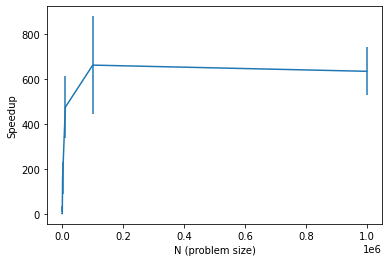

In [ ]:
f, ax = plt.subplots(figsize=(6,4))
ax.errorbar(l_N, py_mean_su, py_std_su, label='py') 
ax.set_ylabel("Speedup")
ax.set_xlabel("N (problem size)")

Text(0.5, 0, 'N (problem size)')

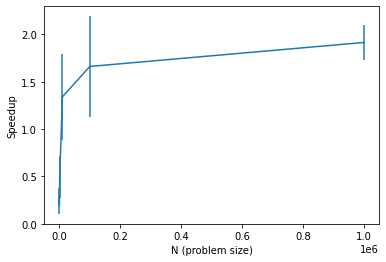

In [ ]:
f, ax = plt.subplots(figsize=(6,4))
ax.errorbar(l_N, njit_mean_su, njit_std_su, label='py') 
ax.set_ylabel("Speedup")
ax.set_xlabel("N (problem size)")

7. Finally, plot both speed-up. To see the differences, add `plt.loglog()` and `
plt.axhline(1, color='k', alpha=0.3, ls='--')` at the end of each cell. Your plots will change both x- and y-axis to log-scale. What can we conclude from these results?

Text(0.5, 0, 'N [LOG]')

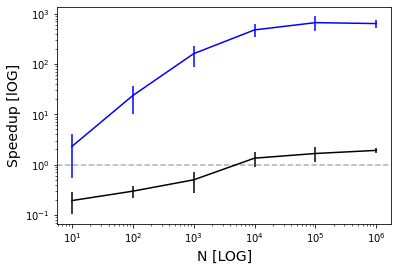

In [ ]:
f, ax = plt.subplots(figsize=(6,4))
ax.errorbar(l_N, py_mean_su, py_std_su, color='blue') 
ax.errorbar(l_N, njit_mean_su, njit_std_su, color='k') 
plt.loglog()
plt.axhline(1, color='k', alpha=0.3, ls='--')
ax.set_ylabel("Speedup [lOG]", fontsize=14)
ax.set_xlabel("N [LOG]", fontsize=14)

---

# Troubleshooting

#### Installing Numba + CUDA on Google Colab!

`(src=https://thedatafrog.com/en/articles/boost-python-gpu/)`

We need to add two libraries: `libdevice` and `libnvvm.so`.

In order to find it we nee to run:


In [ ]:
!find / -iname 'libdevice'

/usr/local/lib/python3.7/dist-packages/jaxlib/cuda/nvvm/libdevice
/usr/local/cuda-11.0/nvvm/libdevice
/usr/local/cuda-11.1/nvvm/libdevice
/usr/local/cuda-10.0/nvvm/libdevice
/usr/local/cuda-10.1/nvvm/libdevice
find: ‘/proc/34/task/34/net’: Invalid argument
find: ‘/proc/34/net’: Invalid argument


In [ ]:
!find / -iname 'libnvvm.so'

/usr/local/cuda-11.0/nvvm/lib64/libnvvm.so
/usr/local/cuda-11.1/nvvm/lib64/libnvvm.so
/usr/local/cuda-10.0/nvvm/lib64/libnvvm.so
/usr/local/cuda-10.1/nvvm/lib64/libnvvm.so
find: ‘/proc/34/task/34/net’: Invalid argument
find: ‘/proc/34/net’: Invalid argument


Finally, execute the cell below:

In [ ]:
import os
os.environ['NUMBAPRO_LIBDEVICE'] = "/usr/local/lib/python3.7/dist-packages/jaxlib/cuda/nvvm/libdevice"
os.environ['NUMBAPRO_NVVM'] = "/usr/local/cuda-10.0/nvvm/lib64/libnvvm.so"

----

Day #2 of the summer course "_Introduction to High-Performance Computing in Python for Scientists!_". 


[Goethe Research Academy for Early Career Researchers (GRADE)](https://www.goethe-university-frankfurt.de/), Goethe University Frankfurt, Germany. June 2022.

---